# PART A (telco churn analysis)

In [70]:
# !pip install scikit-learn pandas//You can install scikit-learn and pandas using pip if you haven't already by uncommenting it
!pip install openpyxl


In [71]:
#Import all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
print("All librares imported successfully!")

All librares imported successfully!


In [72]:

# Load the dataset
# file_path = "C://Users//n//Downloads//churn2.numbers" # Replace with your dataset path
# df = pd.read_csv(file_path, sep='\t')  # Adjust the delimiter if needed

df = pd.read_excel('C://Users//n//Downloads//churn2 (1).xls')

In [73]:
df.head()

,churn2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
1,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
2,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
3,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
4,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE


In [74]:
df.tail()

,churn2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
19996,zero,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,STAY
19997,one,107126,71,82,237397,609,5,2,very_sat,very_little,no,STAY
19998,zero,78529,0,66,172589,275,0,2,unsat,very_high,considering,LEAVE
19999,zero,78674,47,41,572406,288,4,2,very_unsat,little,considering,LEAVE
20000,zero,124697,0,0,845575,808,24,14,unsat,high,actively_looking_into_it,LEAVE


# BASIC EDA AND VISUALIZATIONS

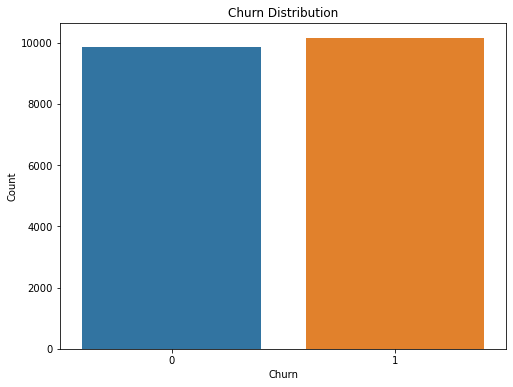

In [75]:
# Distribution of Churn (Target Variable)
# countplot to visualize the distribution of customers who left (churned) and those who stayed
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='LEAVE')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

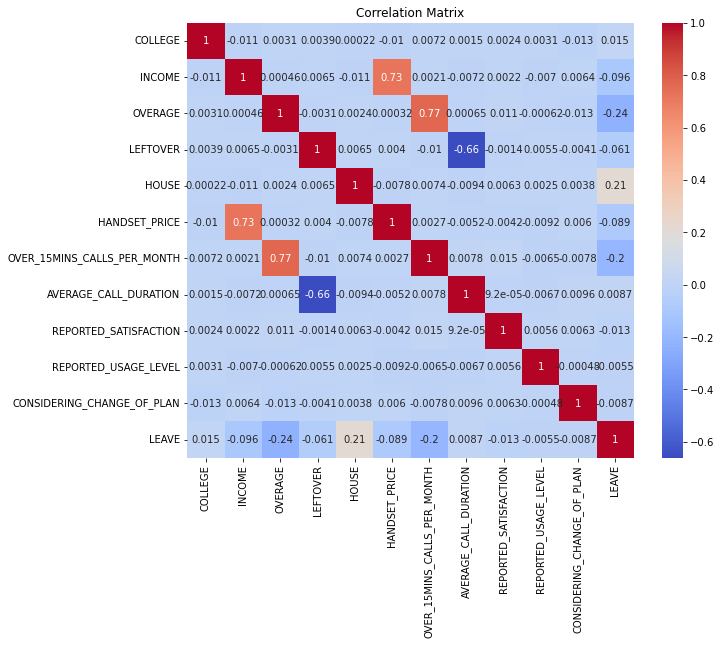

In [76]:
# Correlation Matrix
# To understand the relationships between variables, create a correlation matrix and visualize it using a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


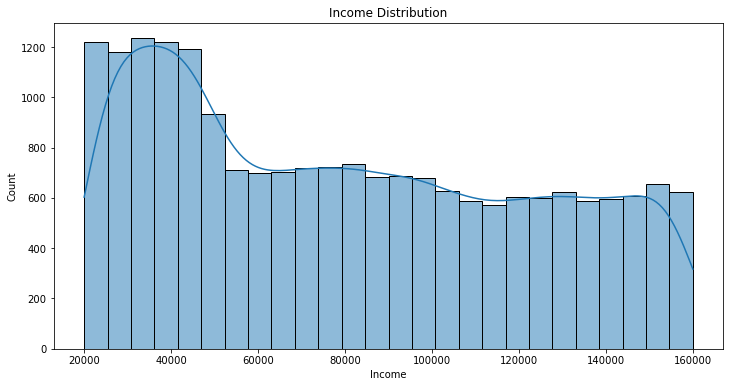

In [77]:
# Distribution of Numeric Features
# Histograms to visualize the distribution of numeric features like 'INCOME', 'AVERAGE_CALL_DURATION'
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='INCOME', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


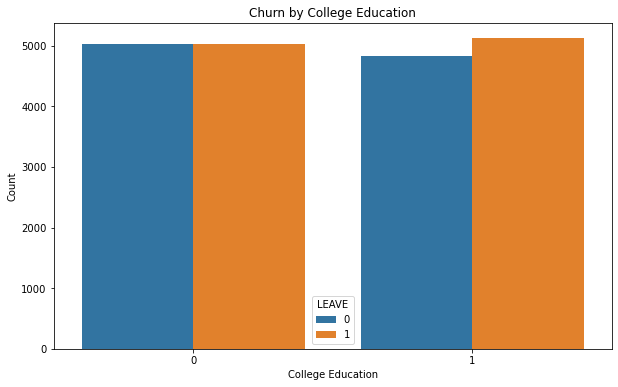

In [78]:
# Categorical Features
# For categorical features like 'COLLEGE' or 'CONSIDERING_CHANGE_OF_PLAN', countplots are used to see the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='COLLEGE', hue='LEAVE')
plt.title('Churn by College Education')
plt.xlabel('College Education')
plt.ylabel('Count')
plt.show()


# Data preprocessing

In [79]:
# Data preprocessing
data = pd.read_excel('C://Users//n//Downloads//churn2.xls')
label_encoder = LabelEncoder()
categorical_columns = ['COLLEGE', 'CONSIDERING_CHANGE_OF_PLAN', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'LEAVE']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
# Divide the data into training and test sets (75% training, 25% test)
X = data.drop(columns=['LEAVE'])
y = data['LEAVE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Decision Tree and Logistic Regression models

In [80]:
# Build Decision Tree and Logistic Regression models
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()

In [ ]:
# Fit the graphical presentation of the Decision Tree
dt_model.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['LEAVE', 'STAY'], filled=True, rounded=True)
plt.show()

# 10-fold cross-validation

In [ ]:
# Perform 10-fold cross-validation
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='accuracy')

# Calculate average accuracy and standard deviation
avg_accuracy_dt = dt_scores.mean()
std_accuracy_dt = dt_scores.std()
avg_accuracy_lr = lr_scores.mean()
std_accuracy_lr = lr_scores.std()

# Report accuracy for each fold
for i in range(10):
    print(f"Fold {i + 1}: Decision Tree Accuracy = {dt_scores[i]:.2f}, Logistic Regression Accuracy = {lr_scores[i]:.2f}")

# Report average accuracy and standard deviation
print("Average Accuracy (Decision Tree):", avg_accuracy_dt)
print("Standard Deviation (Decision Tree):", std_accuracy_dt)
print("Average Accuracy (Logistic Regression):", avg_accuracy_lr)
print("Standard Deviation (Logistic Regression):", std_accuracy_lr)


In [ ]:
#THE END